Plot some of the products for presentations

In [1]:
import rasterio
import numpy
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rasterio.plot as plot

# Setup Paths to Data

In [2]:
DATA_DIR = Path(f'data/')
DATA_DIR.exists()

True

In [3]:
hh_paths = sorted(list(DATA_DIR.glob('*/*hh*.tif')))
hv_paths = sorted(list(DATA_DIR.glob('*/*hv*.tif')))
vv_paths = sorted(list(DATA_DIR.glob('*/*vv*.tif')))
hv_paths

[PosixPath('data/hv/UAVSAR_RTC_hv_20190620.tif'),
 PosixPath('data/hv/UAVSAR_RTC_hv_20190701.tif'),
 PosixPath('data/hv/UAVSAR_RTC_hv_20190716.tif'),
 PosixPath('data/hv/UAVSAR_RTC_hv_20190725.tif'),
 PosixPath('data/hv/UAVSAR_RTC_hv_20190812.tif'),
 PosixPath('data/hv/UAVSAR_RTC_hv_20190923.tif'),
 PosixPath('data/hv/UAVSAR_RTC_hv_20190930.tif')]

In [7]:
CHANGE_DIR = Path('out/change_maps')
CHANGE_DIR.exists()

True

In [8]:
PLOT_DIR = Path('plots')
PLOT_DIR.mkdir(exist_ok=True, parents=True)

In [41]:
POL = 'hh'
INDEX = 1

# Read Tifs

In [10]:
def read_arr(path):
    with rasterio.open(path) as ds:
        arr = (ds.read(1))
    return arr
hv_ts = list(map(read_arr, hv_paths))
hh_ts = list(map(read_arr, hh_paths))
vv_ts = list(map(read_arr, vv_paths))

In [11]:
with rasterio.open(hh_paths[0]) as ds:
    transform = ds.transform

In [43]:
df_all = gpd.read_file(CHANGE_DIR/f'{POL}/{POL}_change_map_combined_shp')
df_all.head()

,label,date,geometry
0,2,2019-07-16,"POLYGON ((-91.53135 29.58165, -91.53115 29.581..."
1,5,2019-09-23,"POLYGON ((-91.53515 29.58185, -91.53485 29.581..."
2,5,2019-09-23,"POLYGON ((-91.53565 29.58085, -91.53555 29.580..."
3,5,2019-09-23,"POLYGON ((-91.53595 29.58075, -91.53565 29.580..."
4,5,2019-09-23,"POLYGON ((-91.53565 29.58065, -91.53555 29.580..."


In [44]:
date_dict = {k: date_str for (k, date_str) in enumerate(sorted(df_all.date.unique()))}
date_dict

{0: '2019-07-01',
 1: '2019-07-16',
 2: '2019-07-25',
 3: '2019-08-12',
 4: '2019-09-23',
 5: '2019-09-30'}

In [45]:
df = gpd.read_file(CHANGE_DIR/f'{POL}/{POL}_{INDEX}_{date_dict[INDEX]}')
df.head()

,label,geometry
0,1.0,"POLYGON ((-91.53135 29.58165, -91.53115 29.581..."
1,1.0,"POLYGON ((-91.50755 29.57855, -91.50705 29.578..."
2,1.0,"POLYGON ((-91.50965 29.57875, -91.50895 29.578..."
3,1.0,"POLYGON ((-91.50605 29.57785, -91.50595 29.577..."
4,1.0,"POLYGON ((-91.52665 29.57705, -91.52645 29.577..."


<AxesSubplot:>

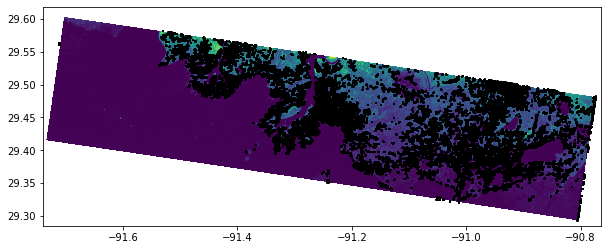

In [46]:
X = hh_ts[INDEX]

fig, ax = plt.subplots(figsize=(10, 10))
plot.show(X, transform=transform, ax=ax)
df.plot(ax=ax, edgecolor='black', facecolor=(0, 0, 0, 0), lw=2, zorder=2)

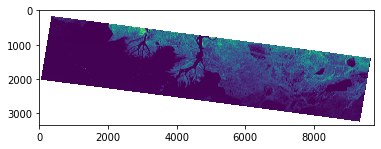

In [47]:
plt.imshow(X)

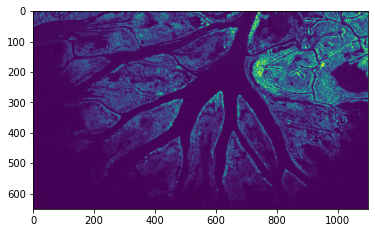

In [57]:
sy = np.s_[750: 1_400]
sx = np.s_[2_400: 3_500]

plt.imshow(X[sy, sx])

In [58]:
(xmin, xmax), (ymin, ymax) = rasterio.transform.xy(transform, [sy.start, sy.stop], [sx.start, sx.stop])

xmin, xmax = min((xmin, xmax)), max((xmin, xmax))
ymin, ymax = min((ymin, ymax)), max((ymin, ymax))

In [61]:
FIGSIZE = (12, 12)

Text(68.25, 0.5, 'Latitude')

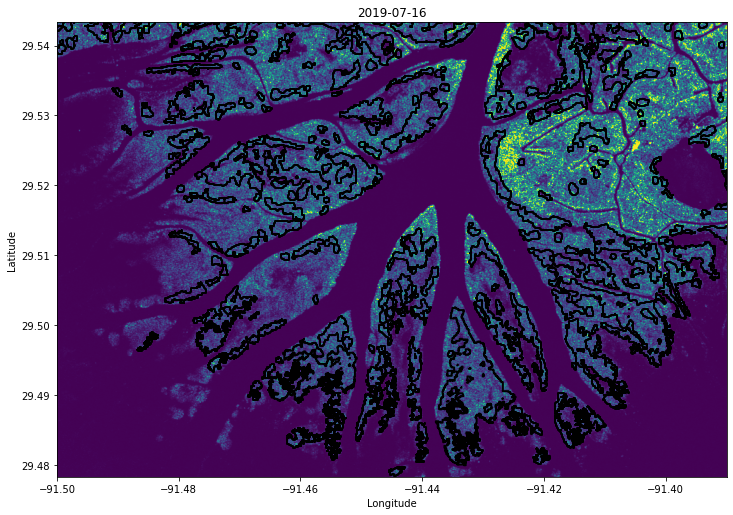

In [67]:
fig, ax = plt.subplots(figsize=FIGSIZE)
X = hh_ts[INDEX]

plot.show(X, transform=transform, ax=ax)
df.plot(ax=ax, edgecolor='black', facecolor=(0, 0, 0, 0), lw=2, zorder=2)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

ax.set_title(date_dict[INDEX])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

Text(68.25, 0.5, 'Latitude')

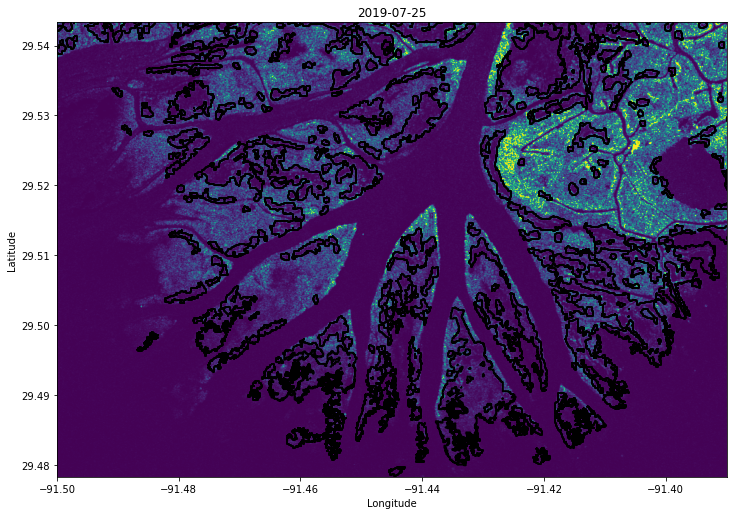

In [65]:
fig, ax = plt.subplots(figsize=FIGSIZE)
X = hh_ts[INDEX + 1]
plot.show(X, transform=transform, ax=ax)
df.plot(ax=ax, edgecolor='black', facecolor=(0, 0, 0, 0), lw=2, zorder=2)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

ax.set_title(date_dict[INDEX+1])

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

Text(68.25, 0.5, 'Latitude')

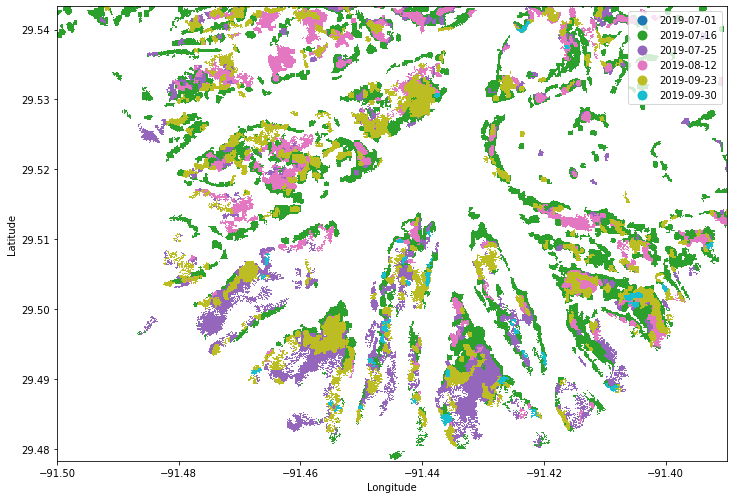

In [66]:
fig, ax = plt.subplots(figsize=FIGSIZE)

df_all.plot(ax=ax, column='date', legend=True)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')